# SSRI Use In Denmark


In [1]:
from src.introduction.medstat.MedStatScraper import MedStatScraperNrUsersSSRI

In [2]:
url = "https://medstat.dk/en/viewDataTables/medicineAndMedicalGroups/%7B%22year%22:[%222022%22,%222021%22,%222020%22,%222019%22,%222018%22,%222017%22,%222016%22,%222015%22,%222014%22,%222013%22,%222012%22,%222011%22,%222010%22,%222009%22,%222008%22,%222007%22,%222006%22,%222005%22,%222004%22,%222003%22,%222002%22,%222001%22,%222000%22,%221999%22,%221998%22,%221997%22,%221996%22],%22region%22:[%220%22],%22gender%22:[%22A%22],%22ageGroup%22:[%22A%22],%22searchVariable%22:[%22people_count_1000%22],%22errorMessages%22:[],%22atcCode%22:[%22N06AB%22,%22N06AB03%22,%22N06AB04%22,%22N06AB05%22,%22N06AB06%22,%22N06AB08%22,%22N06AB10%22],%22sector%22:[%220%22]%7D"
MedStatScraperNrUsersSSRI = MedStatScraperNrUsersSSRI(url)
MedStatScraperNrUsersSSRI.fetch_html()
MedStatScraperNrUsersSSRI.parse_table()
MedStatScraperNrUsersSSRI.format_dataframe()
df_dk = MedStatScraperNrUsersSSRI.get_dataframe()
df_dk.head(8)

,Drug,ATC-code,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Selective serotonin reuptake inhibitors,N06AB,31.05,33.06,37.77,40.51,45.0,45.21,47.9,50.4,...,49.24,45.68,44.91,43.59,42.27,42.03,42.04,42.32,44.05,45.65
1,Fluoxetine,N06AB03,4.71,4.35,4.54,4.7,4.26,3.88,3.64,3.44,...,2.44,2.24,2.14,2.0,1.88,1.84,1.77,1.66,1.59,1.61
2,Citalopram,N06AB04,16.05,17.59,21.29,23.13,25.84,27.23,28.57,29.11,...,27.77,24.53,22.39,19.73,17.42,15.69,14.26,13.21,12.5,11.76
3,Paroxetine,N06AB05,4.55,4.86,5.1,5.16,5.24,4.49,4.11,3.83,...,2.91,2.69,2.55,2.39,2.25,2.16,2.03,1.92,1.88,1.81
4,Sertraline,N06AB06,6.92,7.41,8.21,8.1,7.68,6.85,6.54,6.62,...,13.2,13.16,14.48,16.19,17.56,19.23,20.83,22.35,24.67,26.9
5,Fluvoxamine,N06AB08,0.21,0.17,0.16,0.13,0.12,0.11,0.09,0.08,...,0.03,0.03,0.03,0.03,0.03,0.02,0.01,0.01,0.02,0.02
6,Escitalopram,N06AB10,NaN,NaN,NaN,1.17,4.26,4.83,7.44,9.89,...,4.57,4.35,4.59,4.43,4.18,4.11,4.09,4.14,4.27,4.45


In [3]:
import seaborn as sns

# Use color palette Accent and append as a column
palette = sns.color_palette("Accent", 7)
if "color" not in df_dk.columns:
    df_dk.insert(2, "color", palette)

# Creating a dictionary to map colors to ATC codes
atc_to_color = dict(zip(df_dk["ATC-code"], df_dk["color"]))

# Saving the DataFrame to a CSV file
df_dk.to_csv("../data/00-introduction/medstat_ssri_use.csv", index=False)

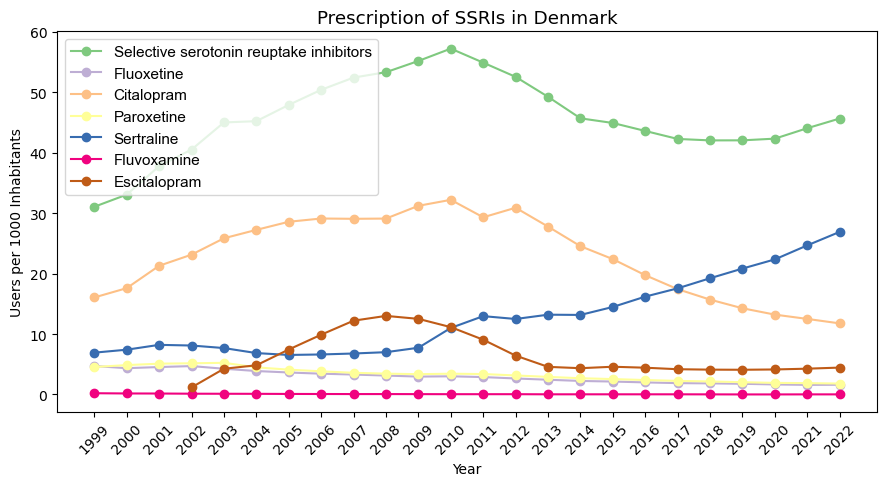

In [4]:
import matplotlib.pyplot as plt

# Set the figure size for better readability
fig_dk, ax_dk = plt.subplots(figsize=(9, 5))

# change font to arial
plt.rcParams["font.family"] = "Arial"
# font size 11
plt.rcParams["font.size"] = 11

# Iterate over each row to plot a line for each drug
for index, row in df_dk.iterrows():
    ax_dk.plot(
        df_dk.columns[3:], row[3:], label=row["Drug"], color=row["color"], marker="o"
    )

# Add labels and title
ax_dk.set_xlabel("Year")
ax_dk.set_ylabel("Users per 1000 Inhabitants")
ax_dk.set_title("Prescription of SSRIs in Denmark")
plt.xticks(df_dk.columns[3:], rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.savefig("../output/figures/ssriUseDenmark.png", dpi=300)
plt.show()

# SSRI Use In The US

## Data Description

Data from the [MEPS-HC can be accessed here](https://datatools.ahrq.gov/meps-hc/?tab=prescribed-drugs&dash=18)

About the MEPS-HC
: The MEPS Household Component collects data on all members of sample households from selected communities across the United States. These data can be used to produce nationally representative estimates of medical conditions, health status, use of medical care services, charges and payments, access to care, experience with care, health insurance coverage, income, and employment.

The summary tables provide frequently used summary estimates for the U.S. civilian non-institutionalized population.

This tool is provided as a convenience. It is the responsibility of the user to review the results for statistical significance and overall reasonableness.

MEPTS HC DATA DESCRIPTION
: MEPS-HC survey participants are asked about their prescription drugs and then are asked for permission to collect more detailed information from their pharmacies. At the pharmacies, data are collected on the type, dosage, and payment for each filled prescription. No information is collected for over-the-counter medications. No information is collected for prescription drugs obtained during hospital visits.

`Measure Values`
Number of people with purchase in thousands by prescribed drug, United States, 1996 to 2021 (95% confidence intervals)

**Suggested Citation**

Agency for Healthcare Research and Quality. Number of people with purchase in thousands by therapeutic class, United States, 1996 to 2020. Medical Expenditure Panel Survey.

check drugs to chose from [Mayo Clinic here](https://www.mayoclinic.org/diseases-conditions/depression/in-depth/antidepressants/art-20046273)


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
path = "/Users/jlq293/Projects/Study-1-Bibliometrics/data/00-introduction/MEPS_HC_PrescribedDrugs_Trends.xlsx"
df_us = pd.read_excel(path, sheet_name="Table Data")

# remove all rows where Measure Names is not 'Estimate'
df_us = df_us[df_us["Measure Names"] == "Estimate "]

cols_to_drop = ["Reliability", "Suppressed", "Measure Names"]
df_us = df_us.drop(cols_to_drop, axis=1)

# rename columns
df_us.rename(
    columns={
        "Measure Values": "Nr of Users with Purchase",
        "Group Level": "Drug",
        "Year": "Year",
    },
    inplace=True,
)


df_us.shape

(7425, 4)

In [7]:
# select ssri drugs from who atc n06ab

ssri_drugs = [
    "zimeldine",
    "fluoxetine",
    "citalopram",
    "paroxetine",
    "sertraline",
    "alaproclate",
    "fluvoxamine",
    "etoperidone",
    "escitalopram",
]

# only select rows where drug is in ssri_drugs
# df["Drug"] = df["Drug"].str.lower()
df_us_ssris = df_us[df_us["Drug"].str.lower().isin(ssri_drugs)].reset_index(drop=True)
# print unique drugs
print(df_us_ssris["Drug"].unique())
df_us_ssris.shape

['Citalopram' 'Escitalopram' 'Fluoxetine' 'Paroxetine' 'Sertraline']


(125, 4)

## plotting


#### get color from df_dk


In [8]:
df_us_ssris.head()

,Year,Group by,Drug,Nr of Users with Purchase
0,1996,Prescribed drug,Citalopram,NaN
1,1996,Prescribed drug,Escitalopram,NaN
2,1996,Prescribed drug,Fluoxetine,3455.0
3,1996,Prescribed drug,Paroxetine,1956.0
4,1996,Prescribed drug,Sertraline,2759.0


In [9]:
# map color from df_dk to df_us_ssris
df_us_ssris["color"] = df_us_ssris["Drug"].map(df_dk.set_index("Drug")["color"])

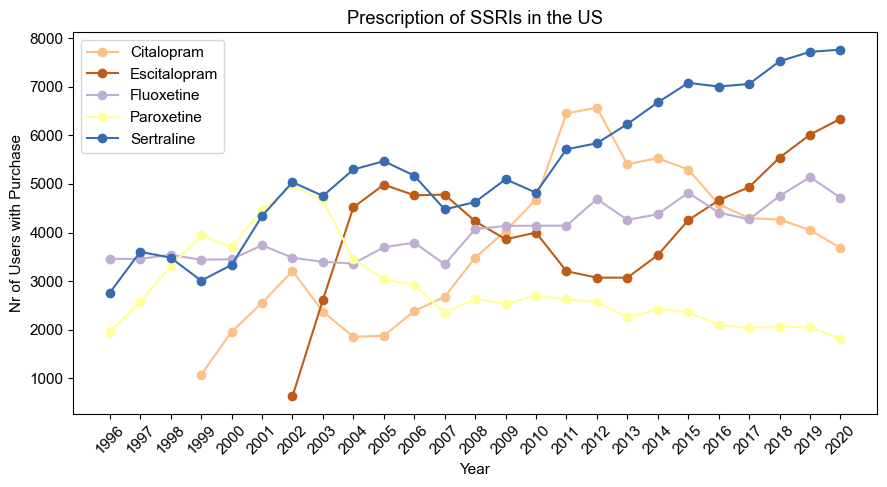

In [10]:
import matplotlib.pyplot as plt

# Assuming df_us_ssris is a DataFrame with columns for each drug and respective user numbers

fig_us, ax_us = plt.subplots(figsize=(9, 5))
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 11

years = []
# Assuming each drug has its own set of years and user data
for drug in df_us_ssris["Drug"].unique():
    drug_data = df_us_ssris[df_us_ssris["Drug"] == drug]
    ax_us.plot(
        drug_data["Year"],
        drug_data["Nr of Users with Purchase"],
        color=drug_data["color"].values[0],
        label=drug,
        marker="o",
    )
    years.append(drug_data["Year"].values)

ax_us.set_xlabel("Year")
ax_us.set_ylabel("Nr of Users with Purchase")
ax_us.set_title("Prescription of SSRIs in the US")
# sort and unique years
years = np.unique(np.concatenate(years))
plt.xticks(years, rotation=45)
plt.legend()

# Show the plot with a tight layout and save it as a PNG file
plt.tight_layout()
plt.savefig("../output/figures/ssriUseUS.png", dpi=300)
plt.show()

# Plot together as subplots


/var/folders/6m/zjbwrdgj0bg9zyhx3l7134mm0000gn/T/ipykernel_91809/2341832706.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


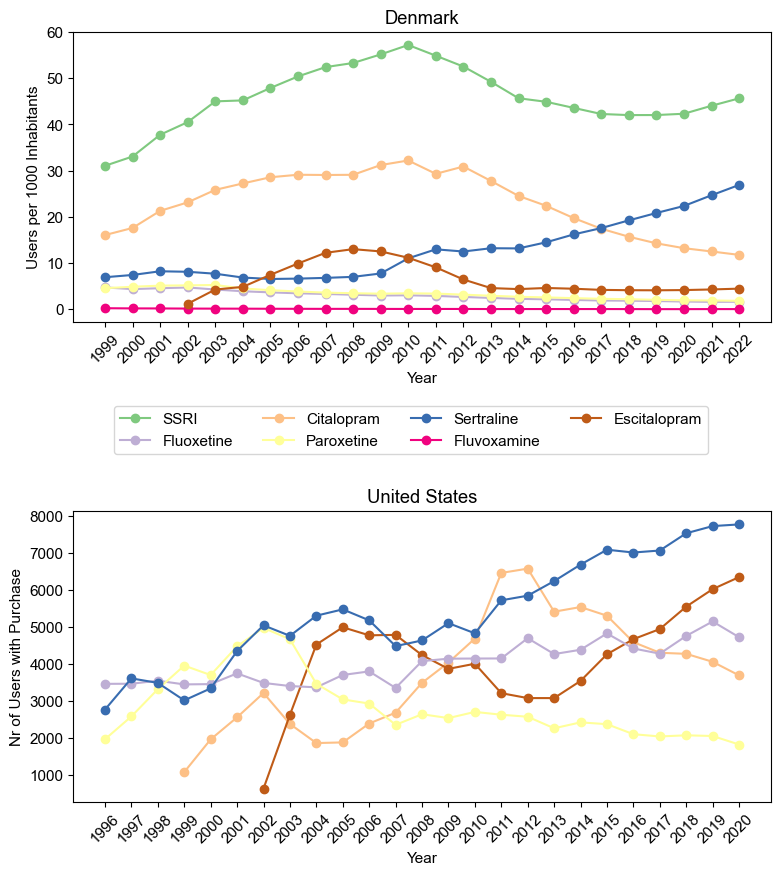

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and two subplots (2 rows, 1 column) with adjusted spacing
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 10), gridspec_kw={"hspace": 0.65})

# Initialize an empty list to store legend handles and labels
handles, labels = [], []

# Plotting for Denmark
for index, row in df_dk.iterrows():
    (line,) = ax1.plot(
        df_dk.columns[3:], row[3:], label=row["Drug"], color=row["color"], marker="o"
    )
    handles.append(line)
    labels.append(row["Drug"])
ax1.set_xlabel("Year")
ax1.set_ylabel("Users per 1000 Inhabitants")
ax1.set_title("Denmark")
ax1.set_xticks(df_dk.columns[3:])
ax1.set_xticklabels(df_dk.columns[3:], rotation=45)

# Plotting for the US
years = []
for drug in df_us_ssris["Drug"].unique():
    drug_data = df_us_ssris[df_us_ssris["Drug"] == drug]
    (line,) = ax2.plot(
        drug_data["Year"],
        drug_data["Nr of Users with Purchase"],
        color=drug_data["color"].values[0],
        label=drug,
        marker="o",
    )
    if drug not in labels:
        handles.append(line)
        labels.append(drug)
    years.append(drug_data["Year"].values)

years = np.unique(np.concatenate(years))
ax2.set_xticks(years)
ax2.set_xticklabels(years, rotation=45)
ax2.set_xlabel("Year")
ax2.set_ylabel("Nr of Users with Purchase")
ax2.set_title("United States")

labels[labels.index("Selective serotonin reuptake inhibitors")] = "SSRI"

# Create a legend
fig.legend(
    handles,
    labels,
    loc="lower center",
    bbox_to_anchor=(0.5, 0.45),
    ncol=4,  # len(labels)
)

# Use tight layout
plt.tight_layout()

# Save the figure
plt.savefig("../output/figures/ssriUseDkUsComb.png", dpi=300)

# Show the plot
plt.show()

# Approval Timeline EU


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import seaborn as sns

In [10]:
data = {
    "dates": [
        "1982-01-01",
        "1986-09-07",
        "1989-12-31",
        "2001-12-31",
        "1990-12-11",
        "1990-03-01",
        "1961-07-31",
        "1969-03-17",
        "1994-09-01",
        "1993-09-23",
        "2004-08-11",
        "2019-03-05",
    ],
    "ADs": [
        "zimelidine",
        "fluoxetine",
        "citalopram",
        "escitalopram",
        "paroxetine",
        "sertraline",
        "amitriptyline",
        "nortriptyline",
        "mirtazapine",
        "venlafaxine",
        "duloxetine",
        "esketamine",
    ],
    "classes": [
        "SSRI",
        "SSRI",
        "SSRI",
        "SSRI",
        "SSRI",
        "SSRI",
        "Tricyclic",
        "Tricyclic",
        "Other",
        "Other",
        "Other",
        "Esketamine",
    ],
    "colors": [
        "#e1f3dc",
        "#bce4b5",
        "#8ed08b",
        "#56b567",
        "#2c944c",
        "#05712f",
        "#6baed6",
        "#08519c",
        "#fbb4b9",
        "#f768a1",
        "#c51b8a",
        "#bcbddc",
    ],
}

In [11]:
# Create a DataFrame
df = pd.DataFrame(data)

df["dates"] = pd.to_datetime(df["dates"]).dt.year

df_sorted = df.sort_values(by="dates")

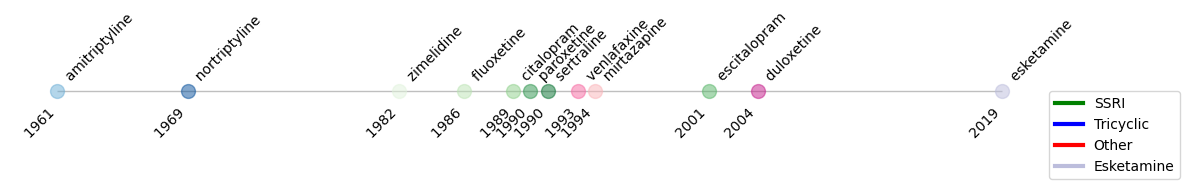

In [13]:
plt.figure(figsize=(12, 2))

# Create a horizontal line from min year to max year
plt.hlines(
    y=0,
    xmin=df_sorted["dates"].min(),
    xmax=df_sorted["dates"].max(),
    color="gray",
    alpha=0.5,
    linewidth=1,
)

# To avoid overlap, track the years we've already plotted
plotted_years = {}

# Create a dot on the line for each year in the dataset
for i in range(len(df_sorted)):
    year = df_sorted.iloc[i]["dates"]
    offset = plotted_years.get(year, 0) * 1.1  # Adjust the offset for overlapping years
    plotted_years[year] = plotted_years.get(year, 0) + 1

    # Plot the dot
    plt.plot(
        year + offset,
        0,
        marker="o",
        markersize=10,
        color=df_sorted.iloc[i]["colors"],
        alpha=0.5,
        linestyle="None",
    )

    # Text for the AD name
    plt.text(
        year + offset,
        0.001,
        f"  {df_sorted.iloc[i]['ADs']}",
        verticalalignment="bottom",
        rotation=45,
        horizontalalignment="left",
    )

    # Text for the year
    plt.text(
        year + offset,
        -0.01,
        f"  {df_sorted.iloc[i]['dates']}",
        verticalalignment="top",
        rotation=45,
        horizontalalignment="right",
    )

# Improve layout
plt.grid(False)
plt.axis("off")
# plt.title("Timeline of Antidepressants by Year")
plt.xlabel("Year")
plt.yticks([])

# Custom legend for classes
legend_dict = {
    "SSRI": "green",
    "Tricyclic": "blue",
    "Other": "red",
    "Esketamine": "#bcbddc",
}

# Create and place the legend
plt.legend(
    handles=[
        plt.Line2D(
            [0],
            [0],
            color=color,
            linewidth=3,
            linestyle="-",
            label=label,
        )
        for label, color in legend_dict.items()
    ],
    bbox_to_anchor=(1.0, 0.5),
    loc="upper left",
    borderaxespad=0.0,
)

# Show plot
plt.tight_layout()
plt.savefig("../output/figures/approval_timeline_EU.png", dpi=300)
plt.show()